In [1]:
sc

from pyspark.sql import SQLContext,Row
from pyspark import SparkConf,SparkContext
import numpy as np
import pandas as pd

rdd=sc.textFile("file:///home/cloudera/Downloads/train.csv")

In [2]:
header=rdd.first()

In [3]:
#Get the Header row and 

rddheader = rdd.first()
header = sc.parallelize([rddheader])
rdddata = rdd.subtract(header)

In [4]:
def func(line):
    l1=line.split(",")
    return Row(Id=l1[0],MSSubClass=l1[1],MSZoning=l1[2],LotFrontage=str(l1[3]),
               LotArea=float(l1[4]),Street=l1[5],Alley=l1[6],
               LotShape=l1[7],LandContour=l1[8],Utilities=l1[9],LotConfig=l1[10],
               LandSlope=l1[11],Neighborhood=l1[12],Condition1=l1[13],Condition2=l1[14],BldgType=l1[15],
               HouseStyle=l1[16],OverallQual=l1[17],OverallCond=l1[18],YearBuilt=l1[19],YearRemodAdd=l1[20],
               RoofStyle=l1[21],RoofMatl=l1[22],Exterior1st=l1[23],Exterior2nd=l1[24],MasVnrType=l1[25],
               MasVnrArea=l1[26],ExterQual=l1[27],ExterCond=l1[28],Foundation=l1[29],BsmtQual=l1[30],
               BsmtCond=l1[31],BsmtExposure=l1[32],BsmtFinType1=l1[33],BsmtFinSF1=str(l1[34]),BsmtFinType2=l1[35],
               BsmtFinSF2=float(l1[36]),BsmtUnfSF=float(l1[37]),TotalBsmtSF=float(l1[38]),Heating=l1[39],HeatingQC=l1[40],
               CentralAir=l1[41],Electrical=l1[42],firstFlrSF=float(l1[43]),secondFlrSF=float(l1[44]),LowQualFinSF=l1[45],
               GrLivArea=float(l1[46]),BsmtFullBath=float(l1[47]),BsmtHalfBath=float(l1[48]),FullBath=float(l1[49]),
               HalfBath=float(l1[50]),BedroomAbvGr=float(l1[51]),KitchenAbvGr=float(l1[52]),KitchenQual=l1[53],
               TotRmsAbvGrd=float(l1[54]),Functional=l1[55],Fireplaces=float(l1[56]),
               FireplaceQu=l1[57],GarageType=l1[58],GarageYrBlt=l1[59],GarageFinish=l1[60],
               GarageCars=float(l1[61]),GarageArea=float(l1[62]),GarageQual=l1[63],GarageCond=l1[64],PavedDrive=l1[65],
               WoodDeckSF=float(l1[66]),OpenPorchSF=float(l1[67]),EnclosedPorch=float(l1[68]),threeSsnPorch=float(l1[69]),
               ScreenPorch=float(l1[70]),PoolArea=float(l1[71]),PoolQC=l1[72],Fence=l1[73],MiscFeature=l1[74],
               MiscVal=float(l1[75]),MoSold=l1[76],YrSold=l1[77],SaleType=l1[78],SaleCondition=l1[79],SalePrice=l1[80])
 

In [11]:
res=rdddata.map(func)

In [12]:
res.take(2)

[Row(Alley=u'Pave', BedroomAbvGr=2.0, BldgType=u'TwnhsE', BsmtCond=u'TA', BsmtExposure=u'No', BsmtFinSF1='0', BsmtFinSF2=0.0, BsmtFinType1=u'Unf', BsmtFinType2=u'Unf', BsmtFullBath=0.0, BsmtHalfBath=0.0, BsmtQual=u'Gd', BsmtUnfSF=600.0, CentralAir=u'Y', Condition1=u'Norm', Condition2=u'Norm', Electrical=u'SBrkr', EnclosedPorch=0.0, ExterCond=u'TA', ExterQual=u'Gd', Exterior1st=u'MetalSd', Exterior2nd=u'MetalSd', Fence=u'NA', FireplaceQu=u'NA', Fireplaces=0.0, Foundation=u'PConc', FullBath=2.0, Functional=u'Typ', GarageArea=480.0, GarageCars=2.0, GarageCond=u'TA', GarageFinish=u'RFn', GarageQual=u'TA', GarageType=u'Detchd', GarageYrBlt=u'2005', GrLivArea=1200.0, HalfBath=1.0, Heating=u'GasA', HeatingQC=u'Ex', HouseStyle=u'2Story', Id=u'1365', KitchenAbvGr=1.0, KitchenQual=u'Gd', LandContour=u'Lvl', LandSlope=u'Gtl', LotArea=3180.0, LotConfig=u'Inside', LotFrontage='30', LotShape=u'Reg', LowQualFinSF=u'80', MSSubClass=u'160', MSZoning=u'FV', MasVnrArea=u'0', MasVnrType=u'None', MiscFeatu

In [13]:
sqlcontext=SQLContext(sc)

In [14]:
temp=sqlcontext.createDataFrame(res)

In [18]:
temp.registerTempTable("temp_table")

In [16]:
sqlcontext.sql("select * from temp_table")

DataFrame[Alley: string, BedroomAbvGr: double, BldgType: string, BsmtCond: string, BsmtExposure: string, BsmtFinSF1: string, BsmtFinSF2: double, BsmtFinType1: string, BsmtFinType2: string, BsmtFullBath: double, BsmtHalfBath: double, BsmtQual: string, BsmtUnfSF: double, CentralAir: string, Condition1: string, Condition2: string, Electrical: string, EnclosedPorch: double, ExterCond: string, ExterQual: string, Exterior1st: string, Exterior2nd: string, Fence: string, FireplaceQu: string, Fireplaces: double, Foundation: string, FullBath: double, Functional: string, GarageArea: double, GarageCars: double, GarageCond: string, GarageFinish: string, GarageQual: string, GarageType: string, GarageYrBlt: string, GrLivArea: double, HalfBath: double, Heating: string, HeatingQC: string, HouseStyle: string, Id: string, KitchenAbvGr: double, KitchenQual: string, LandContour: string, LandSlope: string, LotArea: double, LotConfig: string, LotFrontage: string, LotShape: string, LowQualFinSF: string, MSSub

In [17]:
result=sqlcontext.sql("select count(*) from temp_table").show()

+----+
| _c0|
+----+
|1460|
+----+



In [24]:
temp.columns

['Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'Id',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SalePrice',
 'Sal

In [25]:
#For Dropping columns having NA values more than 60%
#temp.groupBy(temp.columns[0]).count().show(5)
#temp.filter(temp.groupBy(temp.columns[0]).count()[temp.columns[0]] > 1000).show()
temp_dict={}
for i in range(0,len(temp.columns)):
    temp_dict[temp.columns[i]]=temp.groupBy(temp.columns[i]).count().first()[1],temp.groupBy(temp.columns[i]).count().first()[0]
    

In [32]:
# showing Temp_dict
temp_dict

{'Alley': (1369, u'NA'),
 'BedroomAbvGr': (50, 1.0),
 'BldgType': (31, u'2fmCon'),
 'BsmtCond': (37, u'NA'),
 'BsmtExposure': (38, u'NA'),
 'BsmtFinSF1': (1, u'899'),
 'BsmtFinSF2': (2, 712.0),
 'BsmtFinType1': (37, u'NA'),
 'BsmtFinType2': (38, u'NA'),
 'BsmtFullBath': (588, 1.0),
 'BsmtHalfBath': (80, 1.0),
 'BsmtQual': (37, u'NA'),
 'BsmtUnfSF': (1, 35.0),
 'CentralAir': (95, u'N'),
 'Condition1': (48, u'Artery'),
 'Condition2': (2, u'Artery'),
 'Electrical': (1, u'NA'),
 'EnclosedPorch': (3, 184.0),
 'ExterCond': (146, u'Gd'),
 'ExterQual': (488, u'Gd'),
 'Exterior1st': (1, u'AsphShn'),
 'Exterior2nd': (60, u'CmentBd'),
 'Fence': (1179, u'NA'),
 'FireplaceQu': (690, u'NA'),
 'Fireplaces': (650, 1.0),
 'Foundation': (24, u'Slab'),
 'FullBath': (650, 1.0),
 'Functional': (15, u'Mod'),
 'GarageArea': (9, 312.0),
 'GarageCars': (369, 1.0),
 'GarageCond': (81, u'NA'),
 'GarageFinish': (81, u'NA'),
 'GarageQual': (81, u'NA'),
 'GarageType': (81, u'NA'),
 'GarageYrBlt': (2, u'1918'),
 'Gr

In [26]:
# Creating a list and checking for columns greater than 1000 similar entries.For this we have used the temp_dict and 
# checking in the temp_dict which column has the most number of repeated occurrances to drop the Categorical variable
# which are not adding any value.
l=[]
for key in temp_dict.keys():
    if temp_dict[key][0]>1000:
        l.append(key)
    else:
        continue

In [27]:
l

['LandSlope',
 'KitchenAbvGr',
 'MiscFeature',
 'Utilities',
 'PoolQC',
 'Fence',
 'SaleCondition',
 'Alley',
 'RoofStyle',
 'Street']

In [33]:
#for col in l:
#    print(str(temp.groupBy(col).count().show()))
    #print(temp_dict[col])

In [36]:
#Dropping columns having same values for most instances
for col in l:
    temp=temp.drop(col)
#Total 10 columns dropped
print("Total Number of columns:"+" "+str(len(temp.columns)))

Total Number of columns: 71


In [39]:
# Converting temp to Pandas and checking the dataframe type
temp.toPandas()
type(temp)

pyspark.sql.dataframe.DataFrame

In [40]:
temp.toPandas().head(5)

,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,...,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,firstFlrSF,secondFlrSF,threeSsnPorch
0,2.0,TwnhsE,TA,No,0,0.0,Unf,Unf,0.0,0.0,...,0.0,4.0,600.0,0.0,2005,2005,2006,520.0,600.0,0.0
1,3.0,1Fam,TA,Mn,0,0.0,Unf,Unf,0.0,0.0,...,0.0,8.0,1095.0,192.0,2006,2006,2006,1095.0,844.0,0.0
2,3.0,1Fam,TA,Av,1162,0.0,ALQ,Unf,0.0,0.0,...,0.0,6.0,1588.0,158.0,1999,1999,2006,1588.0,0.0,0.0
3,3.0,1Fam,TA,No,0,0.0,Unf,Unf,0.0,0.0,...,0.0,10.0,1482.0,0.0,2007,2007,2007,1482.0,1092.0,0.0
4,3.0,1Fam,TA,Av,280,491.0,LwQ,BLQ,1.0,0.0,...,0.0,5.0,938.0,145.0,1975,1980,2008,938.0,0.0,0.0


# Encoding the Categorical Variables


In [41]:
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoder

In [42]:
# Columns containing NA values
NA_cols=[]
for col in temp_dict.keys():
    if 'NA' in temp_dict[col]:
        NA_cols.append(col)
    else:
        continue

In [44]:
# Creating the list of those columns which are NA-l fromm above list and appending it to new list k

k=list(set(NA_cols)-set(l))

In [47]:
k

['MasVnrType',
 'GarageCond',
 'BsmtCond',
 'GarageQual',
 'GarageFinish',
 'BsmtExposure',
 'Electrical',
 'BsmtQual',
 'FireplaceQu',
 'BsmtFinType2',
 'BsmtFinType1',
 'GarageType']

In [48]:
temp.select(k[0]).distinct().show()

+----------+
|MasVnrType|
+----------+
|        NA|
|    BrkCmn|
|     Stone|
|   BrkFace|
|      None|
+----------+



In [49]:
#Remove rows with NA values in MasVnrType
temp.registerTempTable("new_temp")
sqlcontext.sql("select MasVnrType,MasVnrArea from new_temp where MasVnrType='NA'").toPandas()

,MasVnrType,MasVnrArea
0,NA,NA
1,NA,NA
2,NA,NA
3,NA,NA
4,NA,NA
5,NA,NA
6,NA,NA
7,NA,NA


In [51]:
temp.select(k[5]).distinct().show()

+------------+
|BsmtExposure|
+------------+
|          NA|
|          Mn|
|          Gd|
|          No|
|          Av|
+------------+



In [52]:
#Remove rows with NA values in Electrical -Just 1 row
temp.registerTempTable("new_temp")
sqlcontext.sql("select Electrical,CentralAir,HeatingQC ,SalePrice from new_temp where Electrical='NA'").toPandas()

,Electrical,CentralAir,HeatingQC,SalePrice
0,NA,Y,Gd,167500


In [53]:
temp.select(k[10]).distinct().show()

+------------+
|BsmtFinType1|
+------------+
|          NA|
|         BLQ|
|         GLQ|
|         ALQ|
|         Unf|
|         LwQ|
|         Rec|
+------------+



In [54]:
#Remove rows with NA values in Electrical -Just 1 row
temp.registerTempTable("new_temp")
clean_temp=sqlcontext.sql("select * from (select * from new_temp where MasVnrType!='NA') as s where s.Electrical!='NA'")

In [55]:
clean_temp.select('MiscVal').show()#

+-------+
|MiscVal|
+-------+
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
+-------+
only showing top 20 rows



In [56]:
num_cols=['SalePrice','MiscVal','ScreenPorch','threeSsnPorch','EnclosedPorch','OpenPorchSF','WoodDeckSF','GarageArea','GarageCars','Fireplaces','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','firstFlrSF','secondFlrSF','LowQualFinSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd']

In [57]:
categoricalcols=[]
for col in clean_temp.columns:
    if col in num_cols:
        pass
    else:
        categoricalcols.append(col)

In [58]:
from pyspark.sql.types import DoubleType

In [59]:
temp.select(categoricalcols).dtypes

[('BldgType', 'string'),
 ('BsmtCond', 'string'),
 ('BsmtExposure', 'string'),
 ('BsmtFinType1', 'string'),
 ('BsmtFinType2', 'string'),
 ('BsmtFullBath', 'double'),
 ('BsmtHalfBath', 'double'),
 ('BsmtQual', 'string'),
 ('CentralAir', 'string'),
 ('Condition1', 'string'),
 ('Condition2', 'string'),
 ('Electrical', 'string'),
 ('ExterCond', 'string'),
 ('ExterQual', 'string'),
 ('Exterior1st', 'string'),
 ('Exterior2nd', 'string'),
 ('FireplaceQu', 'string'),
 ('Foundation', 'string'),
 ('Functional', 'string'),
 ('GarageCond', 'string'),
 ('GarageFinish', 'string'),
 ('GarageQual', 'string'),
 ('GarageType', 'string'),
 ('GarageYrBlt', 'string'),
 ('Heating', 'string'),
 ('HeatingQC', 'string'),
 ('HouseStyle', 'string'),
 ('Id', 'string'),
 ('KitchenQual', 'string'),
 ('LandContour', 'string'),
 ('LotConfig', 'string'),
 ('LotShape', 'string'),
 ('MSSubClass', 'string'),
 ('MSZoning', 'string'),
 ('MasVnrType', 'string'),
 ('MoSold', 'string'),
 ('Neighborhood', 'string'),
 ('Overall

In [60]:
flag=0
for col in categoricalcols:
    if flag != 1:
        indexer = StringIndexer(inputCol=col, outputCol=col+"_categorical").fit(clean_temp)
        indexed_df = indexer.transform(clean_temp)
        #indexed_df.drop("bar").show()
        #indexed_df.toPandas()
        flag=1
    else:
        indexer = StringIndexer(inputCol=col, outputCol=col+"_categorical").fit(indexed_df)
        indexed_df = indexer.transform(indexed_df)

In [61]:
indexed_df.toPandas()

,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,...,Neighborhood_categorical,OverallCond_categorical,OverallQual_categorical,PavedDrive_categorical,PoolArea_categorical,RoofMatl_categorical,SaleType_categorical,YearBuilt_categorical,YearRemodAdd_categorical,YrSold_categorical
0,2.0,TwnhsE,TA,No,0,0.0,Unf,Unf,0.0,0.0,...,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
1,3.0,1Fam,TA,Mn,0,0.0,Unf,Unf,0.0,0.0,...,4.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
2,3.0,1Fam,TA,Av,1162,0.0,ALQ,Unf,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,12.0,2.0
3,3.0,1Fam,TA,No,0,0.0,Unf,Unf,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,3.0,2.0,1.0
4,3.0,1Fam,TA,Av,280,491.0,LwQ,BLQ,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,62.0,36.0,3.0
5,3.0,1Fam,TA,Av,810,0.0,GLQ,Unf,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,20.0,6.0,3.0
6,5.0,1Fam,TA,No,523,0.0,GLQ,Unf,1.0,0.0,...,17.0,5.0,2.0,0.0,0.0,0.0,0.0,7.0,14.0,0.0
7,4.0,2fmCon,TA,No,0,0.0,Unf,Unf,0.0,0.0,...,2.0,3.0,1.0,0.0,0.0,0.0,0.0,32.0,0.0,2.0
8,3.0,1Fam,TA,No,0,0.0,Unf,Unf,0.0,0.0,...,10.0,3.0,0.0,0.0,0.0,0.0,0.0,98.0,32.0,2.0
9,3.0,Twnhs,TA,No,378,0.0,GLQ,Unf,0.0,0.0,...,4.0,0.0,1.0,0.0,0.0,0.0,0.0,14.0,5.0,4.0


In [98]:
df=indexed_df.toPandas()
type(indexed_df)

pyspark.sql.dataframe.DataFrame

In [65]:
#Remove NA values from LotFrontage
#Remove duplicate columns after we have created the categorical columns
#Start plotting using matplotlib

In [66]:
import matplotlib.pyplot as plt

In [67]:
df=indexed_df.toPandas()

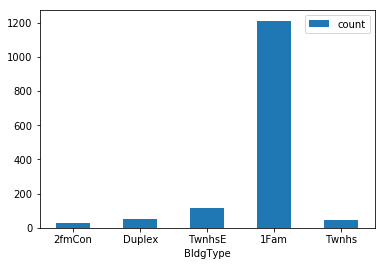

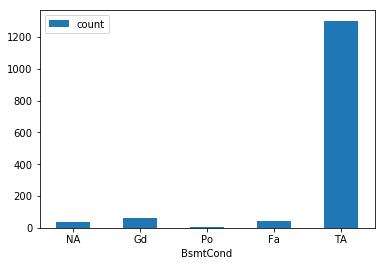

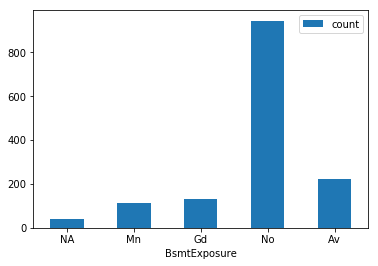

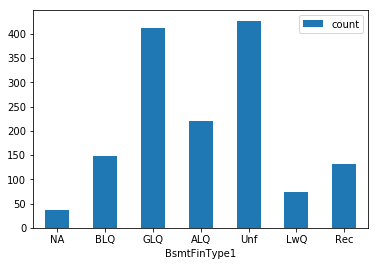

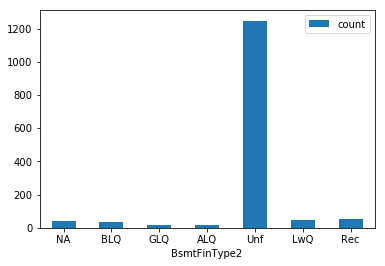

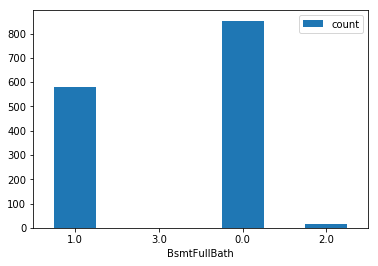

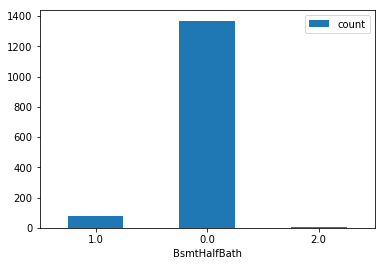

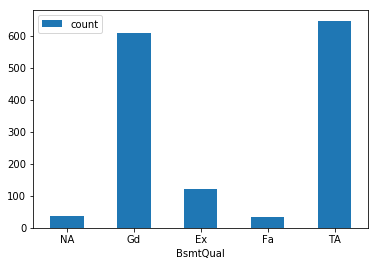

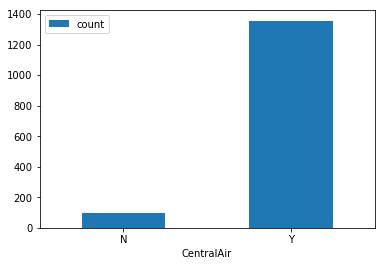

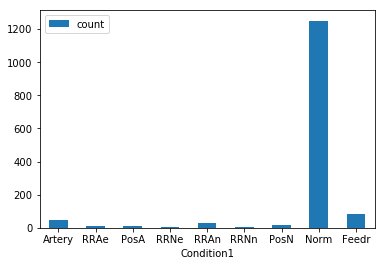

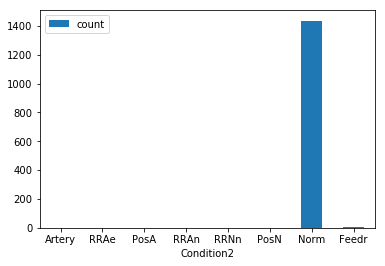

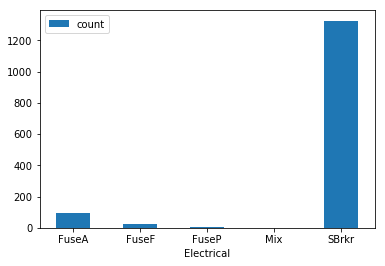

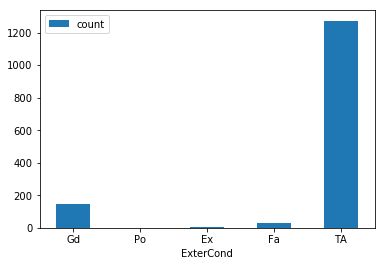

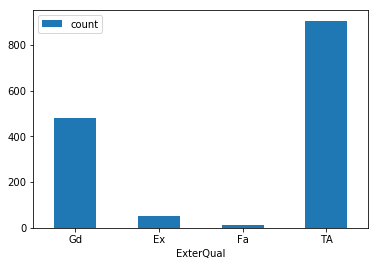

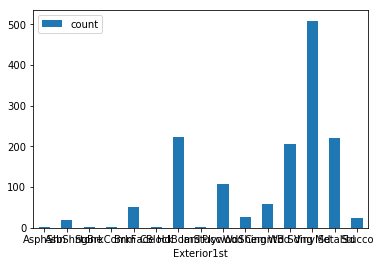

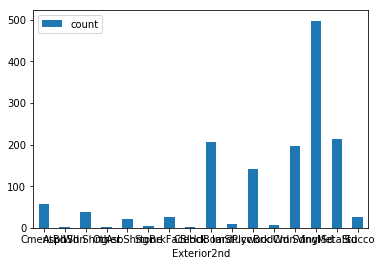

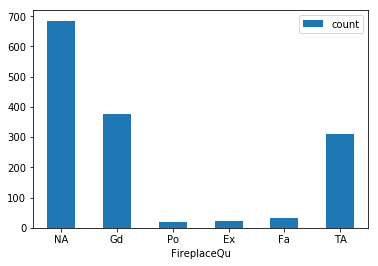

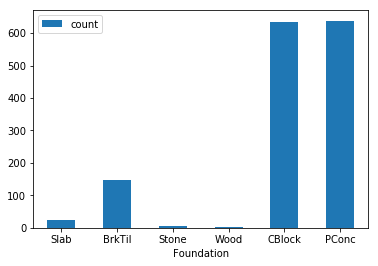

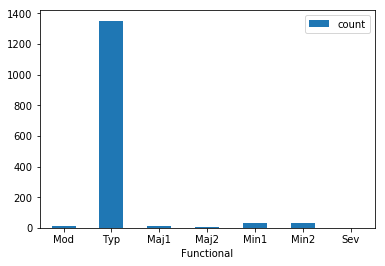

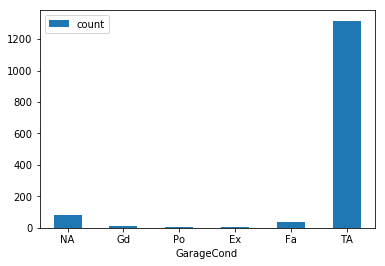

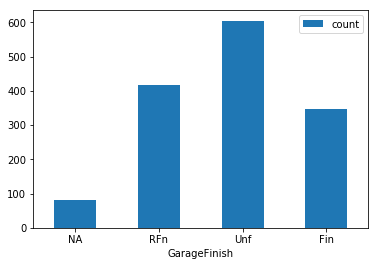

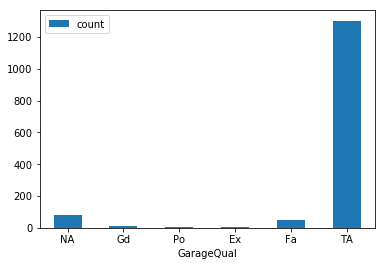

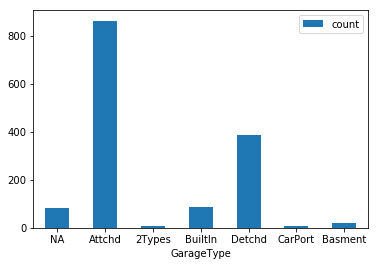

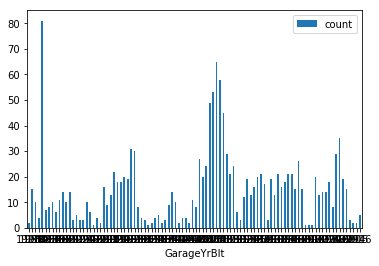

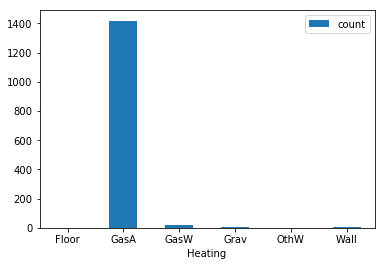

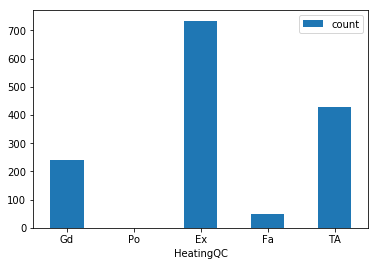

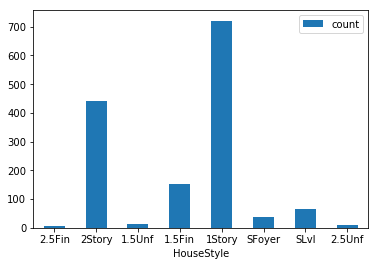

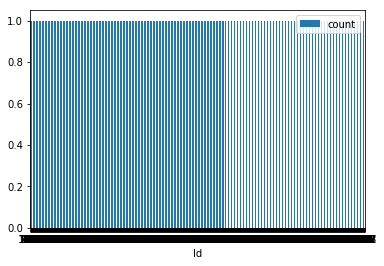

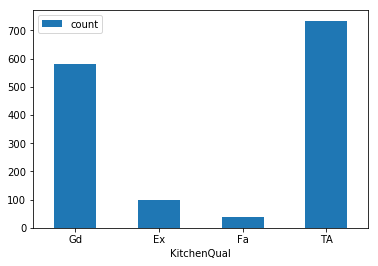

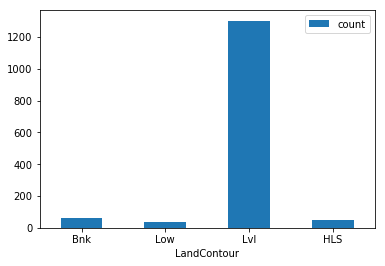

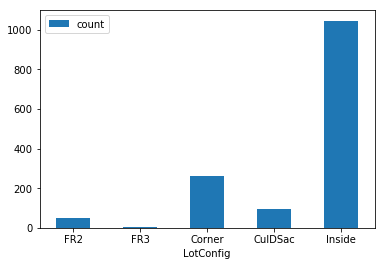

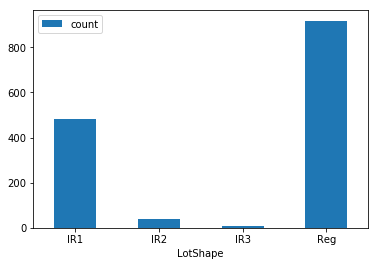

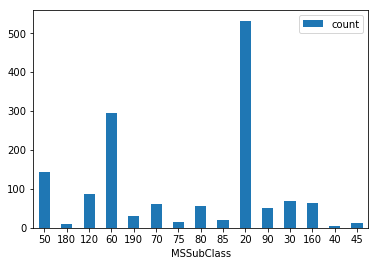

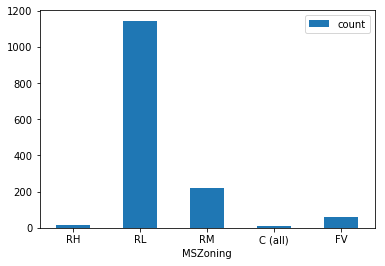

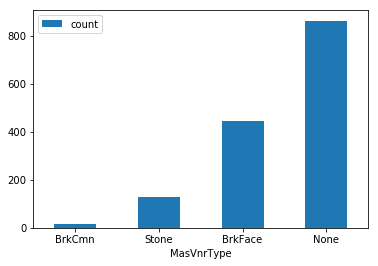

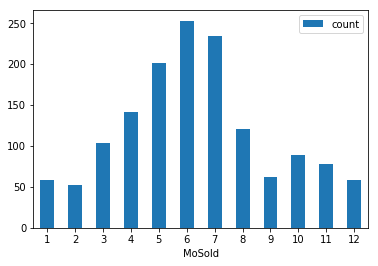

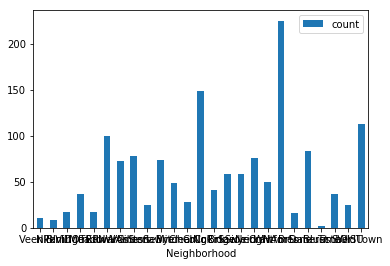

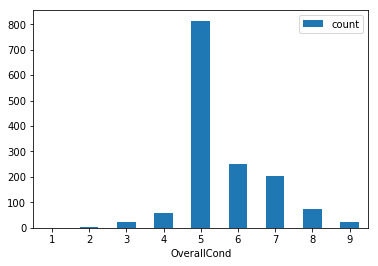

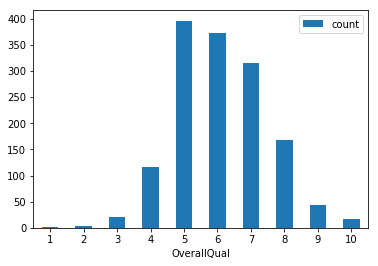

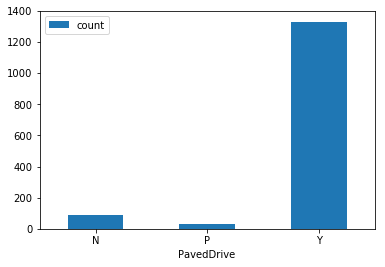

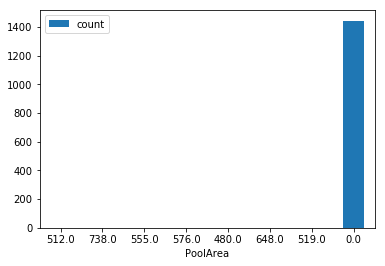

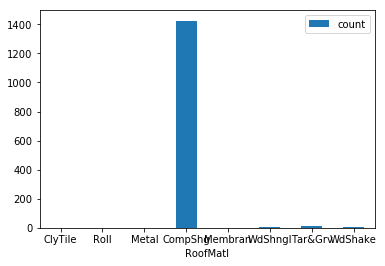

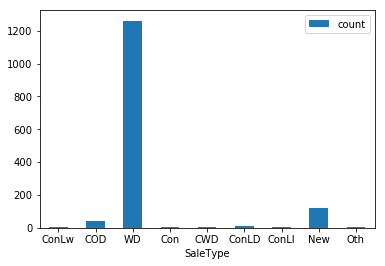

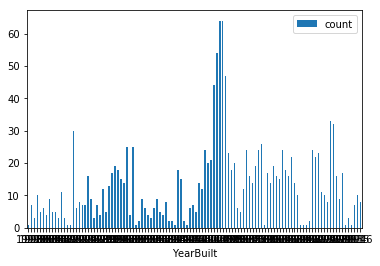

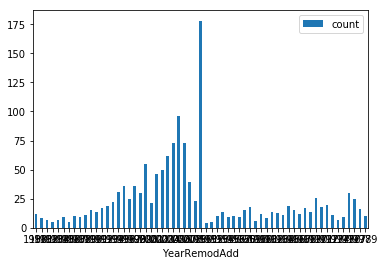

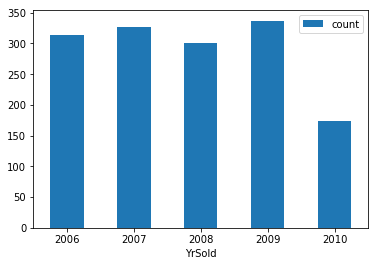

In [94]:
#Bar Plots for Categorical Variables using matplot_lib
for col in categoricalcols:
    try:
        a = indexed_df.groupBy(col).count().toPandas()
        a.plot.bar(x=col,y='count',rot=0)
        plt.show()
    except:
        pass

In [125]:
indexed_df

DataFrame[BedroomAbvGr: double, BldgType: string, BsmtCond: string, BsmtExposure: string, BsmtFinSF1: string, BsmtFinSF2: double, BsmtFinType1: string, BsmtFinType2: string, BsmtFullBath: double, BsmtHalfBath: double, BsmtQual: string, BsmtUnfSF: double, CentralAir: string, Condition1: string, Condition2: string, Electrical: string, EnclosedPorch: double, ExterCond: string, ExterQual: string, Exterior1st: string, Exterior2nd: string, FireplaceQu: string, Fireplaces: double, Foundation: string, FullBath: double, Functional: string, GarageArea: double, GarageCars: double, GarageCond: string, GarageFinish: string, GarageQual: string, GarageType: string, GarageYrBlt: string, GrLivArea: double, HalfBath: double, Heating: string, HeatingQC: string, HouseStyle: string, Id: string, KitchenQual: string, LandContour: string, LotArea: double, LotConfig: string, LotFrontage: string, LotShape: string, LowQualFinSF: string, MSSubClass: string, MSZoning: string, MasVnrArea: string, MasVnrType: string

In [154]:
temp_dict_remodel={}
for i in range(0,len(indexed_df.columns)):
    temp_dict_remodel[indexed_df.columns[i]]=sorted(indexed_df.groupBy(indexed_df.columns[i]).count().collect())[0][1],sorted(indexed_df.groupBy(indexed_df.columns[i]).count().collect())[0][0]

In [153]:
# Map to develop the logic for Groupby and indexing
#sorted(indexed_df.groupBy('PoolArea').count().collect())[0][0]

0.0

In [155]:
temp_dict_remodel

{'BedroomAbvGr': (6, 0.0),
 'BldgType': (1212, u'1Fam'),
 'BldgType_categorical': (1212, 0.0),
 'BsmtCond': (45, u'Fa'),
 'BsmtCond_categorical': (1303, 0.0),
 'BsmtExposure': (221, u'Av'),
 'BsmtExposure_categorical': (945, 0.0),
 'BsmtFinSF1': (464, u'0'),
 'BsmtFinSF2': (1284, 0.0),
 'BsmtFinType1': (220, u'ALQ'),
 'BsmtFinType1_categorical': (427, 0.0),
 'BsmtFinType2': (19, u'ALQ'),
 'BsmtFinType2_categorical': (1247, 0.0),
 'BsmtFullBath': (853, 0.0),
 'BsmtFullBath_categorical': (853, 0.0),
 'BsmtHalfBath': (1369, 0.0),
 'BsmtHalfBath_categorical': (1369, 0.0),
 'BsmtQual': (120, u'Ex'),
 'BsmtQual_categorical': (648, 0.0),
 'BsmtUnfSF': (118, 0.0),
 'CentralAir': (95, u'N'),
 'CentralAir_categorical': (1356, 0.0),
 'Condition1': (48, u'Artery'),
 'Condition1_categorical': (1251, 0.0),
 'Condition2': (2, u'Artery'),
 'Condition2_categorical': (1436, 0.0),
 'Electrical': (94, u'FuseA'),
 'Electrical_categorical': (1326, 0.0),
 'EnclosedPorch': (1244, 0.0),
 'ExterCond': (3, u'Ex'

In [156]:
l_remodel=[]
for key in temp_dict_remodel.keys():
    if temp_dict_remodel[key][0]>1000:
        l_remodel.append(key)
    else:
        continue

In [157]:
l_remodel

['EnclosedPorch',
 'BsmtCond_categorical',
 'PoolArea',
 'MSZoning_categorical',
 'BsmtFinType2_categorical',
 'MiscVal',
 'BsmtHalfBath',
 'LotConfig_categorical',
 'BldgType',
 'Condition1_categorical',
 'threeSsnPorch',
 'PoolArea_categorical',
 'PavedDrive_categorical',
 'GarageQual_categorical',
 'BldgType_categorical',
 'Condition2_categorical',
 'Heating_categorical',
 'RoofMatl_categorical',
 'LowQualFinSF',
 'GarageCond_categorical',
 'BsmtHalfBath_categorical',
 'LandContour_categorical',
 'Electrical_categorical',
 'SaleType_categorical',
 'Functional_categorical',
 'ExterCond_categorical',
 'BsmtFinSF2',
 'ScreenPorch',
 'CentralAir_categorical']

In [162]:
for col in l_remodel:
    indexed_df=indexed_df.drop(col)
print("Total Number of columns:"+" "+str(len(indexed_df.columns)))

Total Number of columns: 88


In [164]:
indexed_df.toPandas().head()

,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtQual,BsmtUnfSF,CentralAir,...,LotShape_categorical,MSSubClass_categorical,MasVnrType_categorical,MoSold_categorical,Neighborhood_categorical,OverallCond_categorical,OverallQual_categorical,YearBuilt_categorical,YearRemodAdd_categorical,YrSold_categorical
0,2.0,TA,No,0,Unf,Unf,0.0,Gd,600.0,Y,...,0.0,5.0,0.0,3.0,4.0,0.0,2.0,0.0,3.0,2.0
1,3.0,TA,Mn,0,Unf,Unf,0.0,Gd,1095.0,Y,...,0.0,1.0,0.0,4.0,4.0,0.0,3.0,1.0,1.0,2.0
2,3.0,TA,Av,1162,ALQ,Unf,0.0,Gd,426.0,Y,...,1.0,0.0,1.0,4.0,1.0,0.0,2.0,9.0,12.0,2.0
3,3.0,TA,No,0,Unf,Unf,0.0,Ex,1482.0,Y,...,1.0,1.0,2.0,7.0,1.0,0.0,3.0,3.0,2.0,1.0
4,3.0,TA,Av,280,LwQ,BLQ,1.0,Gd,167.0,Y,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,62.0,36.0,3.0


In [ ]:
# Check for Graphs and Proceed. 

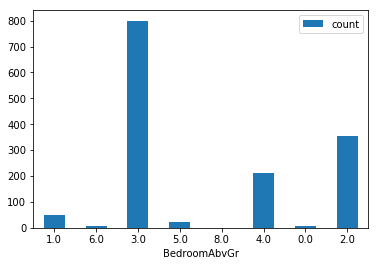

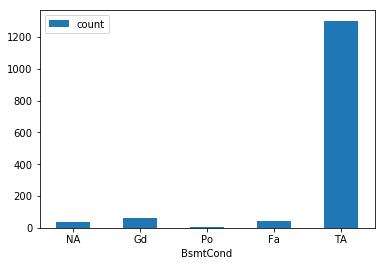

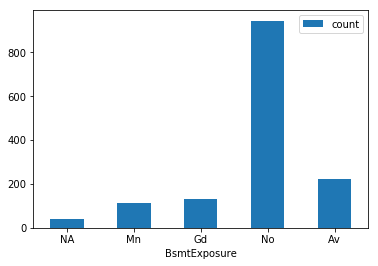

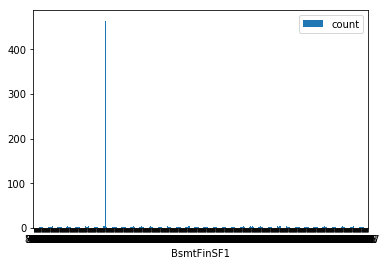

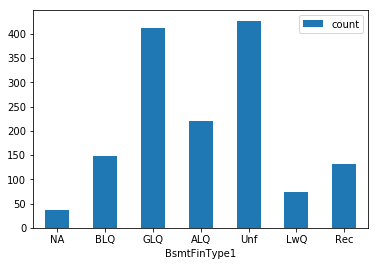

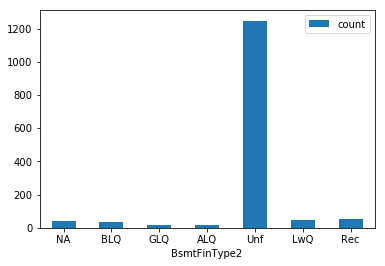

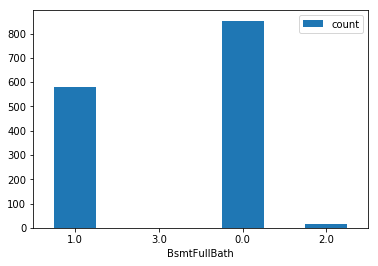

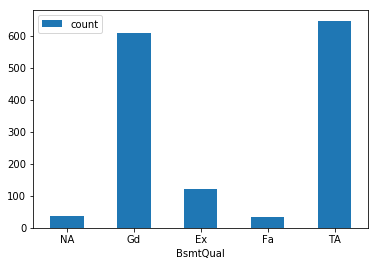

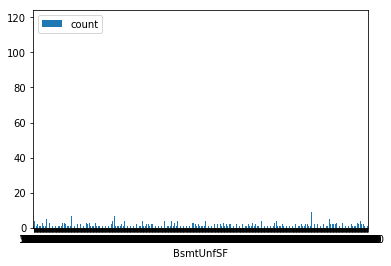

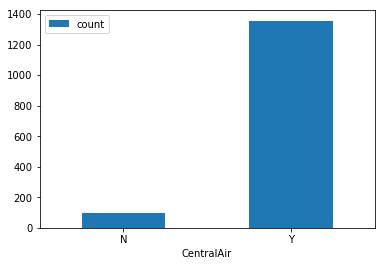

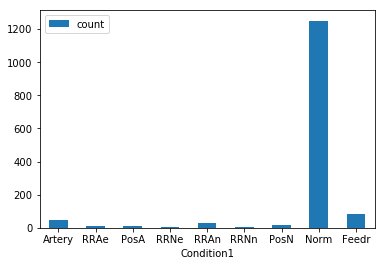

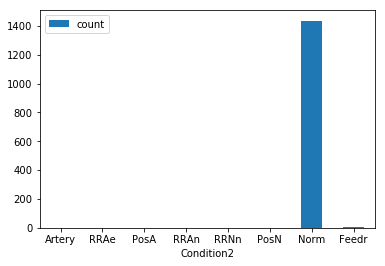

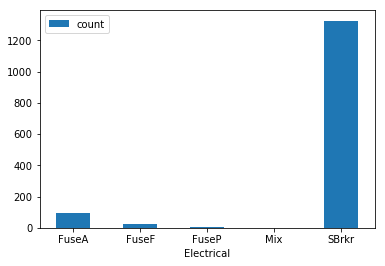

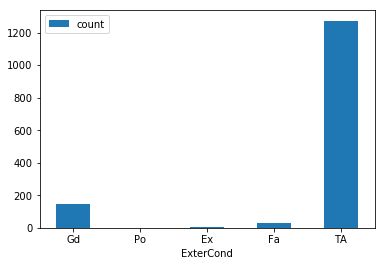

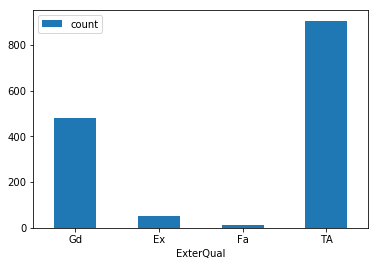

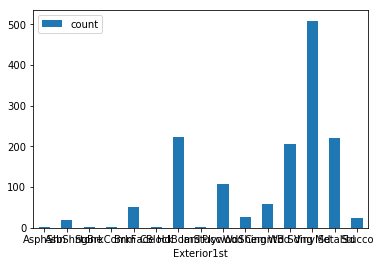

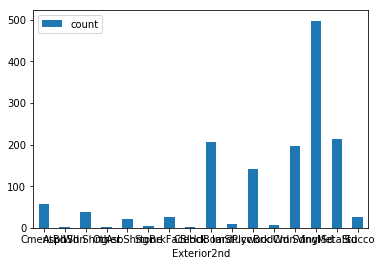

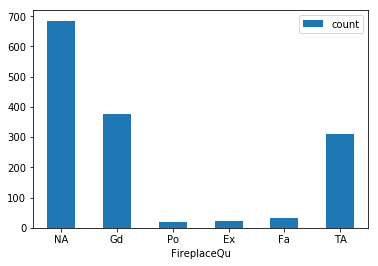

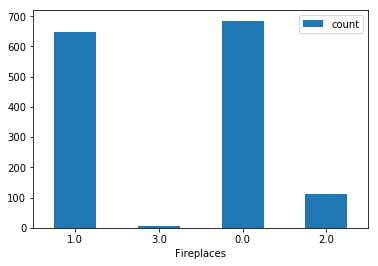

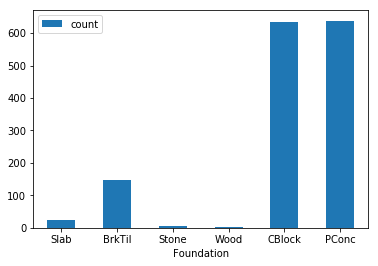

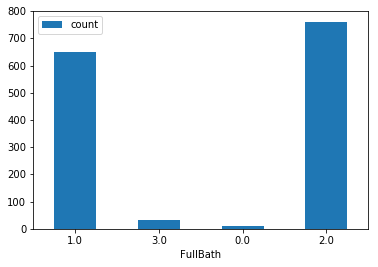

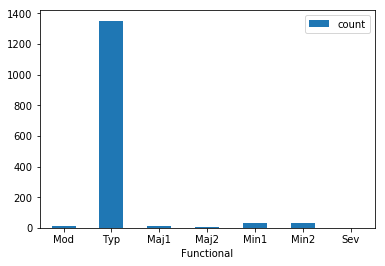

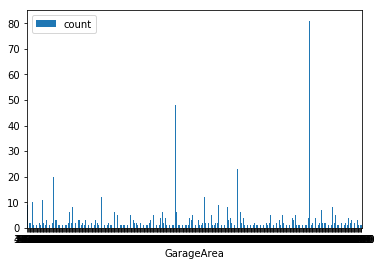

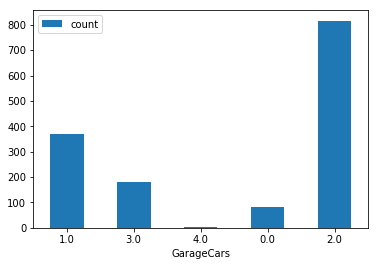

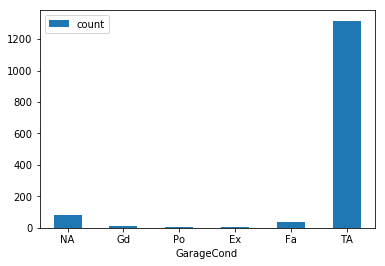

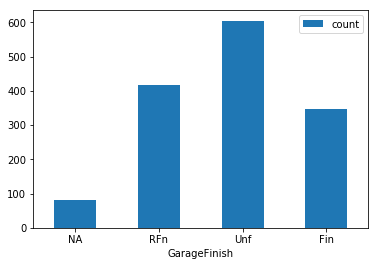

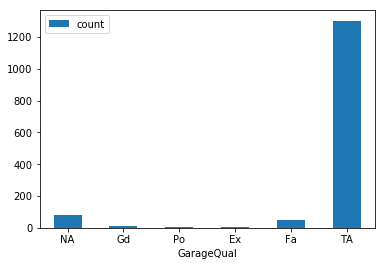

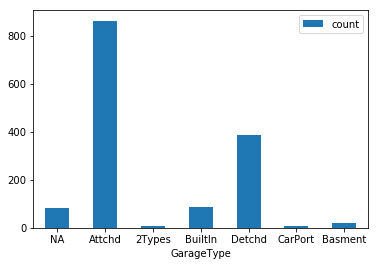

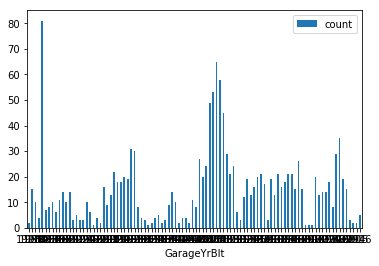

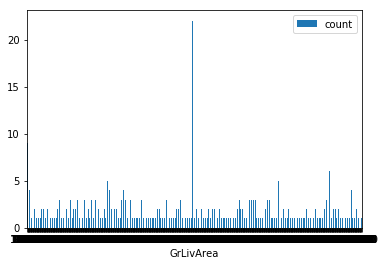

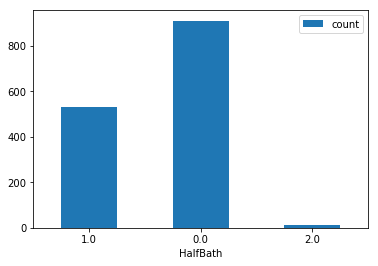

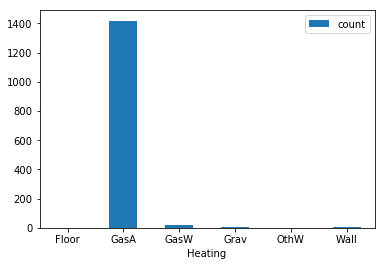

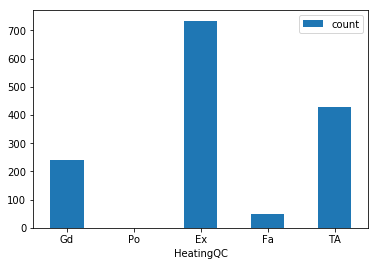

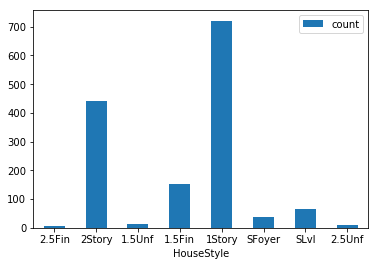

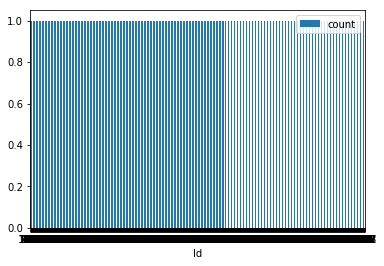

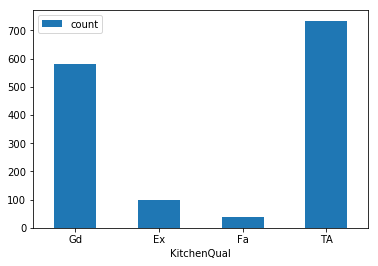

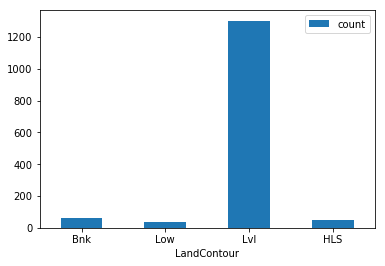

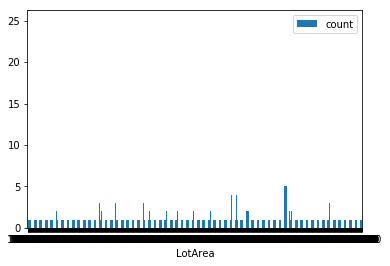

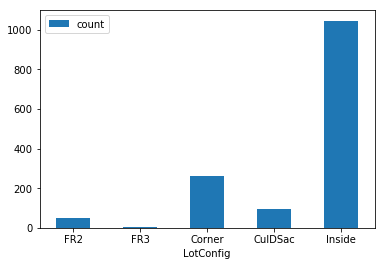

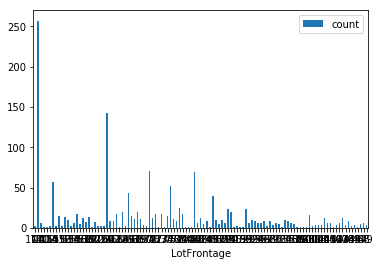

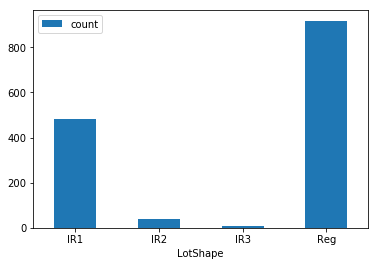

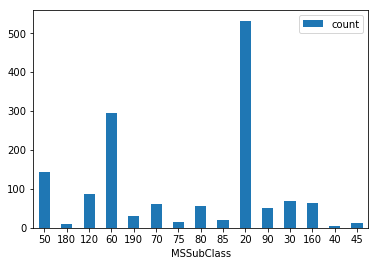

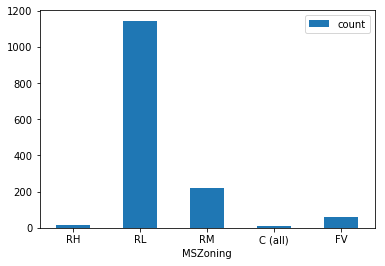

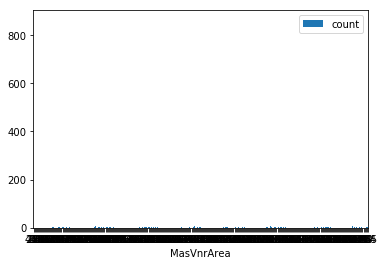

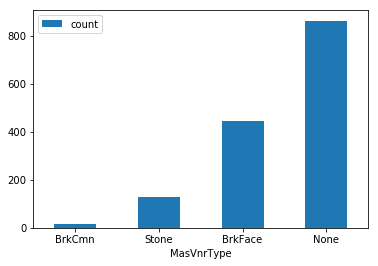

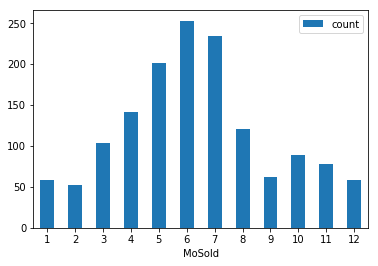

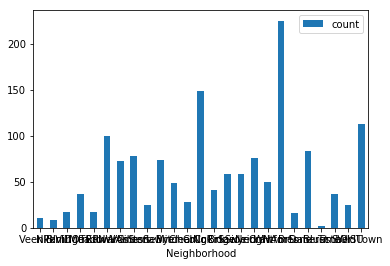

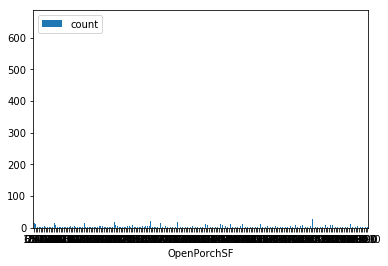

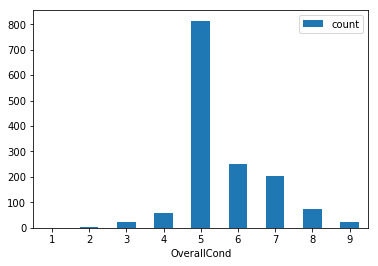

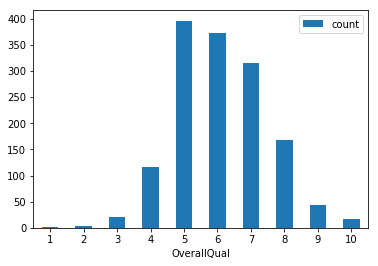

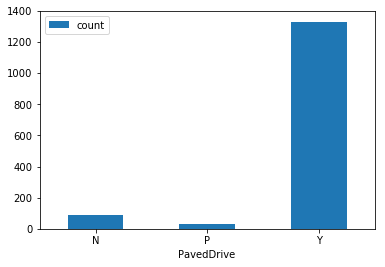

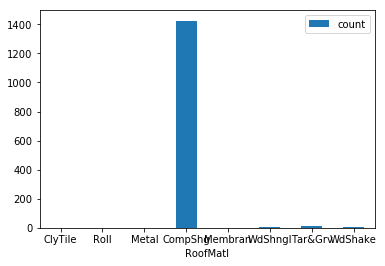

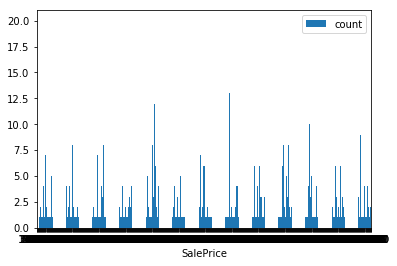

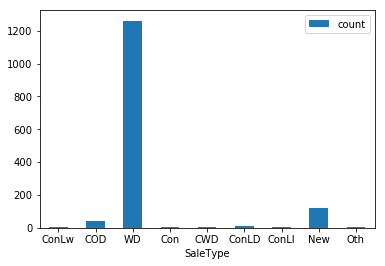

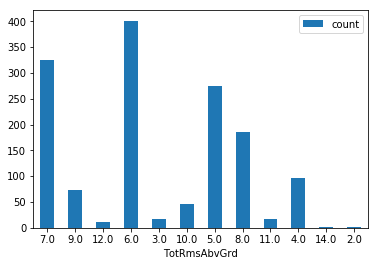

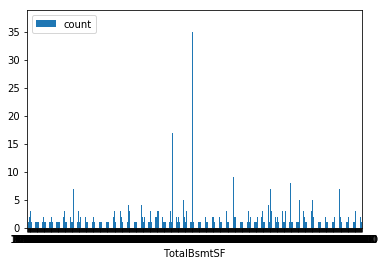

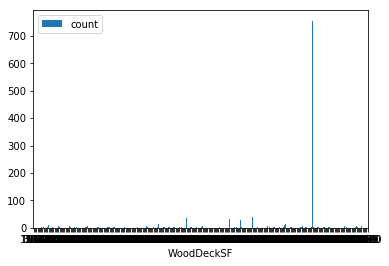

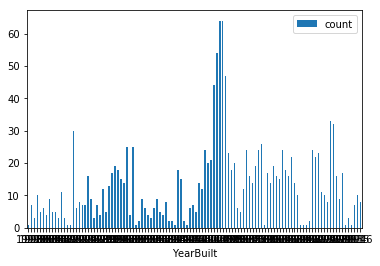

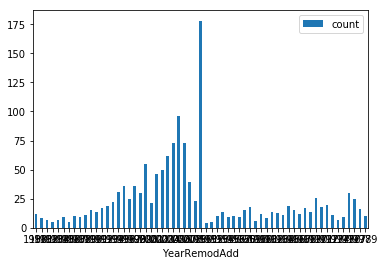

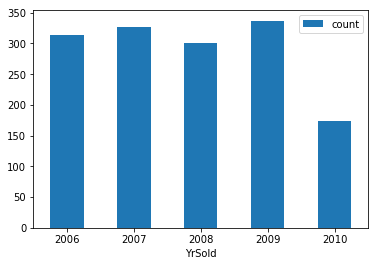

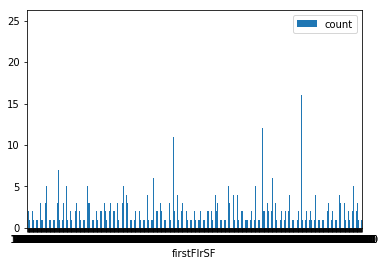

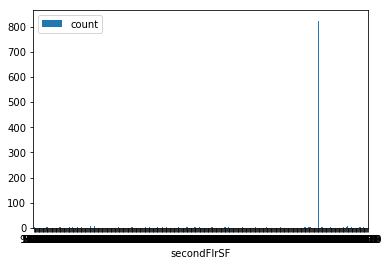

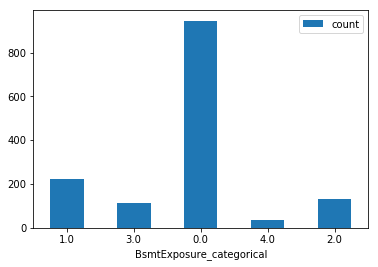

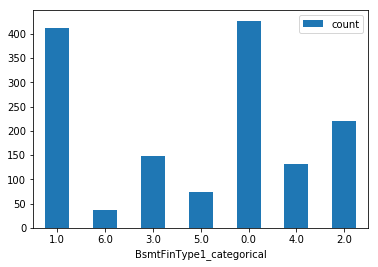

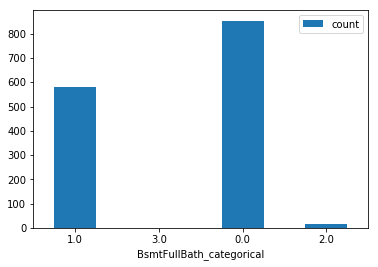

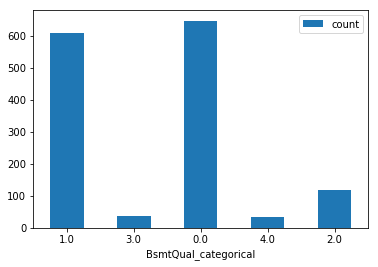

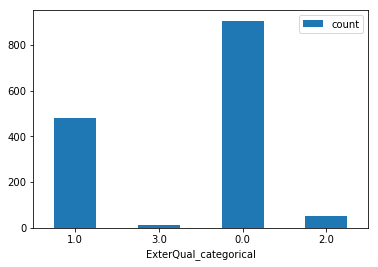

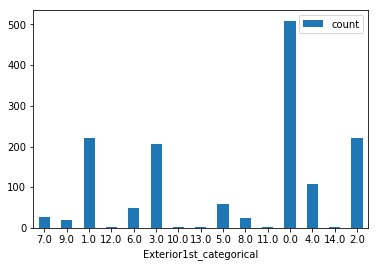

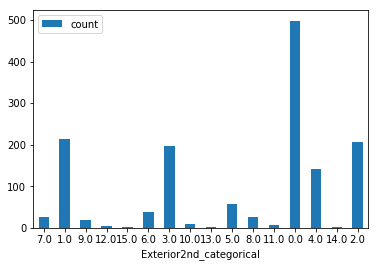

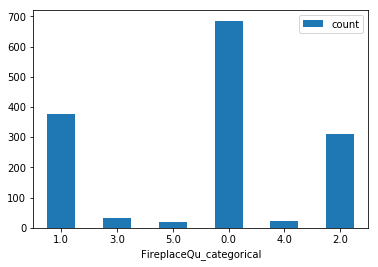

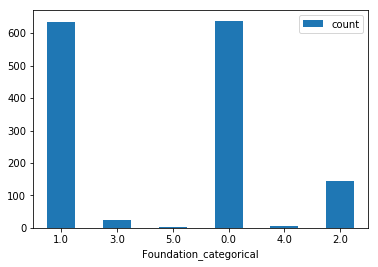

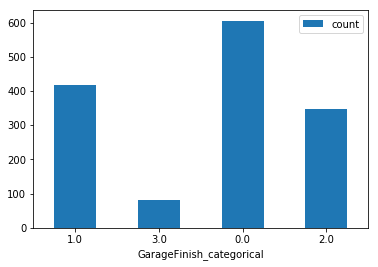

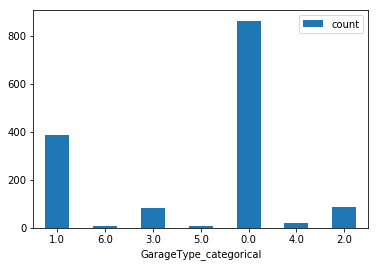

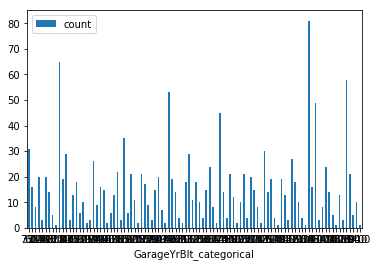

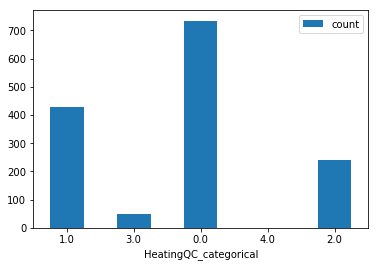

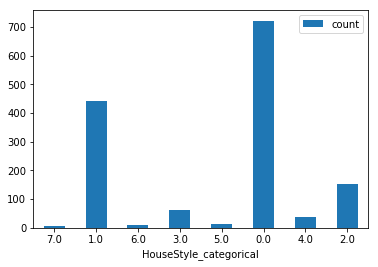

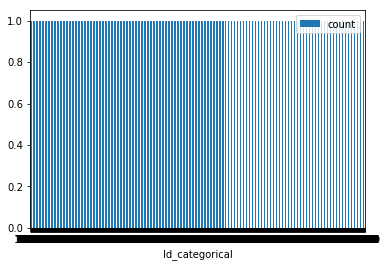

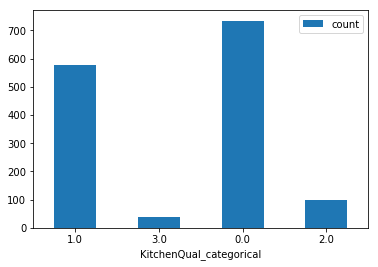

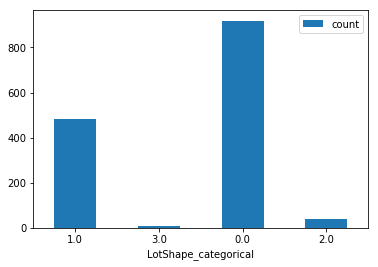

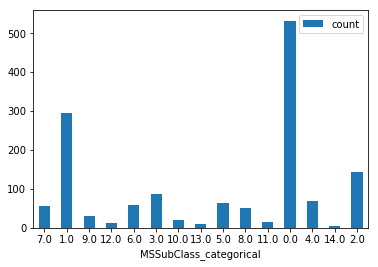

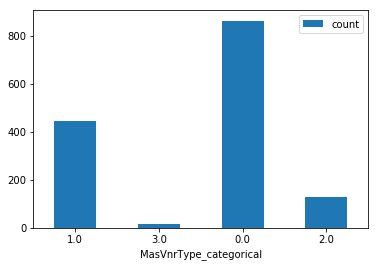

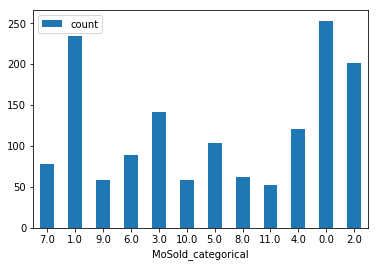

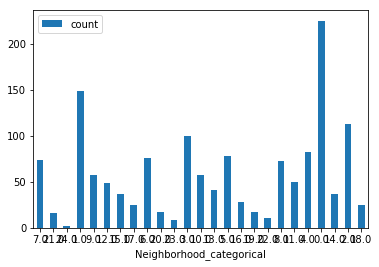

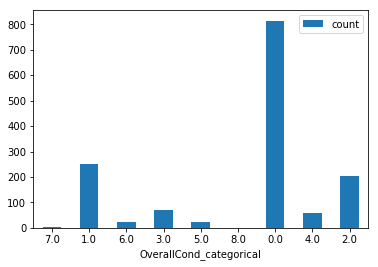

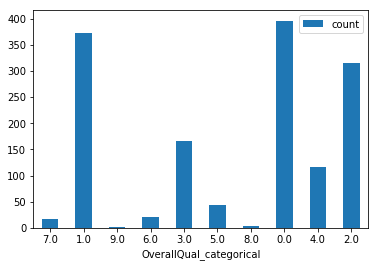

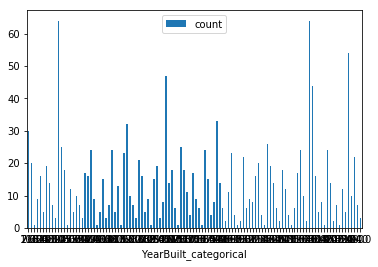

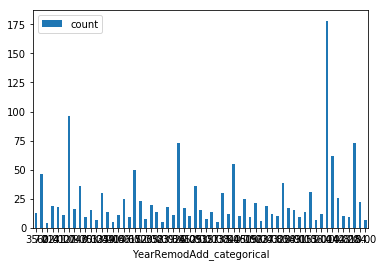

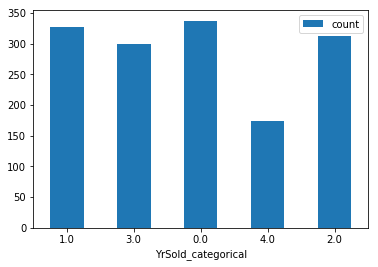

In [163]:
#Bar Plots for Categorical Variables using matplot_lib
for col in indexed_df.columns:
    try:
        a = indexed_df.groupBy(col).count().toPandas()
        a.plot.bar(x=col,y='count',rot=0)
        plt.show()
    except:
        pass

In [ ]:
#Removing those categorical Varibles with similar characteristics
# Check the Plot of Overall quality,Overall condition,Mosolid - This is normally distributed
# M

# Prediction

In [96]:
from __future__ import print_function
from pyspark.ml.regression import LinearRegression
from pyspark.mllib.linalg import Vectors

In [112]:
indexed_df.schema.simpleString

<bound method StructType.simpleString of StructType(List(StructField(BedroomAbvGr,DoubleType,true),StructField(BldgType,StringType,true),StructField(BsmtCond,StringType,true),StructField(BsmtExposure,StringType,true),StructField(BsmtFinSF1,StringType,true),StructField(BsmtFinSF2,DoubleType,true),StructField(BsmtFinType1,StringType,true),StructField(BsmtFinType2,StringType,true),StructField(BsmtFullBath,DoubleType,true),StructField(BsmtHalfBath,DoubleType,true),StructField(BsmtQual,StringType,true),StructField(BsmtUnfSF,DoubleType,true),StructField(CentralAir,StringType,true),StructField(Condition1,StringType,true),StructField(Condition2,StringType,true),StructField(Electrical,StringType,true),StructField(EnclosedPorch,DoubleType,true),StructField(ExterCond,StringType,true),StructField(ExterQual,StringType,true),StructField(Exterior1st,StringType,true),StructField(Exterior2nd,StringType,true),StructField(FireplaceQu,StringType,true),StructField(Fireplaces,DoubleType,true),StructField(Fo

In [101]:
# Let's split our data into training data and testing data
trainTest = indexed_df.randomSplit([0.6, 0.4])
